In [106]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as mpl
import json


with open("parsed.json", "r", encoding='UTF-8') as file:
    data = json.load(file)

df = pd.DataFrame(data)
df.rename(columns={"area":"powierzchnia", "distance_to_metro": "odl_od_metra", "build_year": "rok_budowy",
                    "has_parking":"parking", "floor":"piętro","is_new":"budownictwo", "price":"cena", 
                    "price_m2":"cena_m2", "date_added":"data_dodania"}, inplace=True)
df

,powierzchnia,odl_od_metra,rok_budowy,parking,piętro,budownictwo,cena,cena_m2,data_dodania
0,133.00,8793.806144,2023.0,True,0,False,1075000.0,8082.71,None
1,56.00,14444.384654,NaN,True,2,False,725000.0,12946.43,None
2,60.00,7790.755856,2024.0,True,0,True,820000.0,13666.67,None
3,130.84,4281.306863,2025.0,True,0,True,1390000.0,10623.66,None
4,50.00,539.849235,1977.0,False,4,False,775000.0,15500.00,None
...,...,...,...,...,...,...,...,...,...
10053,197.46,478.316283,2004.0,False,6,False,3790000.0,19193.76,None
10054,96.30,478.316283,2004.0,True,5,False,2215000.0,23001.04,None
10055,55.00,511.467699,2002.0,True,4,False,964000.0,17527.27,None
10056,69.00,511.467699,2002.0,True,6,False,1380000.0,20000.00,None


In [107]:
#ilość wartości null w danej kolumnie
df.isnull().sum()

powierzchnia        0
odl_od_metra        0
rok_budowy        706
parking             0
piętro              0
budownictwo         0
cena                0
cena_m2             0
data_dodania    10058
dtype: int64

In [108]:
df.dtypes

powierzchnia    float64
odl_od_metra    float64
rok_budowy      float64
parking            bool
piętro            int64
budownictwo        bool
cena            float64
cena_m2         float64
data_dodania     object
dtype: object

In [109]:
#zamiana z metrów na km
df["odl_od_metra"] = df["odl_od_metra"].apply(lambda x: round(x/1000, 3))
df

,powierzchnia,odl_od_metra,rok_budowy,parking,piętro,budownictwo,cena,cena_m2,data_dodania
0,133.00,8.794,2023.0,True,0,False,1075000.0,8082.71,None
1,56.00,14.444,NaN,True,2,False,725000.0,12946.43,None
2,60.00,7.791,2024.0,True,0,True,820000.0,13666.67,None
3,130.84,4.281,2025.0,True,0,True,1390000.0,10623.66,None
4,50.00,0.540,1977.0,False,4,False,775000.0,15500.00,None
...,...,...,...,...,...,...,...,...,...
10053,197.46,0.478,2004.0,False,6,False,3790000.0,19193.76,None
10054,96.30,0.478,2004.0,True,5,False,2215000.0,23001.04,None
10055,55.00,0.511,2002.0,True,4,False,964000.0,17527.27,None
10056,69.00,0.511,2002.0,True,6,False,1380000.0,20000.00,None


In [110]:
df.describe().loc[["mean","min","max","std"]].apply(lambda x: round(x, 3))


,powierzchnia,odl_od_metra,rok_budowy,piętro,cena,cena_m2
mean,60.039,2.219,1995.803,3.193,1.155377e+06,18872.345
min,14.530,0.001,1820.000,-1.000,7.820000e+02,13.030
max,1892.030,14.568,2027.000,45.000,1.700000e+07,170000.000
std,36.656,2.096,29.282,3.127,9.496621e+05,6421.052


In [111]:

df.drop(columns=["cena","data_dodania"], axis=1, inplace=True)  # Usunięcie zbędnych kolumn
df.dropna(how="any", inplace=True) #usuniecie rekordów nie posiadających danych o build_year

Data Visualization

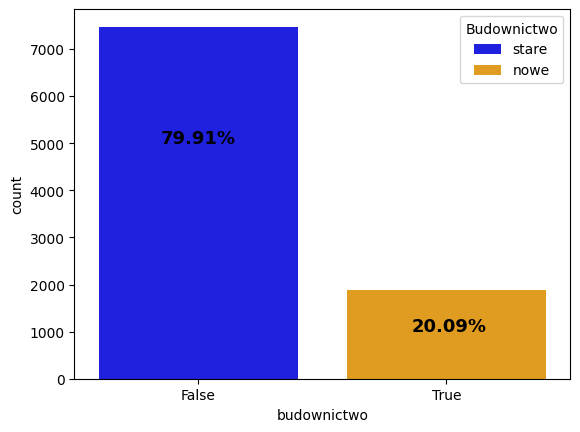

In [112]:
#Udział ogłoszeń budynków ze starego i nowego budownictwa w naszych danych
sns.countplot(x = df["budownictwo"], hue = df.budownictwo, palette=["blue", "orange"])

mpl.text(-0.15, 5000, s = f"{round(df[df["budownictwo"] == False].shape[0]/ df.shape[0] * 100, 2)}%",
        fontsize=13, color='black', weight='bold')

mpl.text(0.86, 1000, s = f"{round(df[df["budownictwo"] == True].shape[0]/ df.shape[0] * 100, 2)}%",
        fontsize=13, color='black', weight='bold')

mpl.legend(title = "Budownictwo",labels = ["stare", "nowe"])

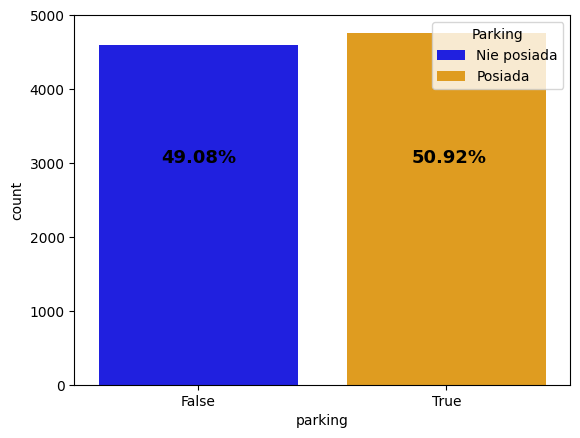

In [113]:
#ilość ogłoszeń, które zawierają parking lub nie
sns.countplot(x = df["parking"], hue = df.parking, palette=["blue", "orange"])

mpl.text(-0.15, 3000, s = f"{round(df[df["parking"] == False].shape[0]/ df.shape[0] * 100, 2)}%",
        fontsize=13, color='black', weight='bold')

mpl.text(0.86, 3000, s = f"{round(df[df["parking"] == True].shape[0]/ df.shape[0] * 100, 2)}%",
        fontsize=13, color='black', weight='bold')

mpl.legend(title = "Parking",labels = ["Nie posiada", "Posiada"])

(0.0, 250.0)

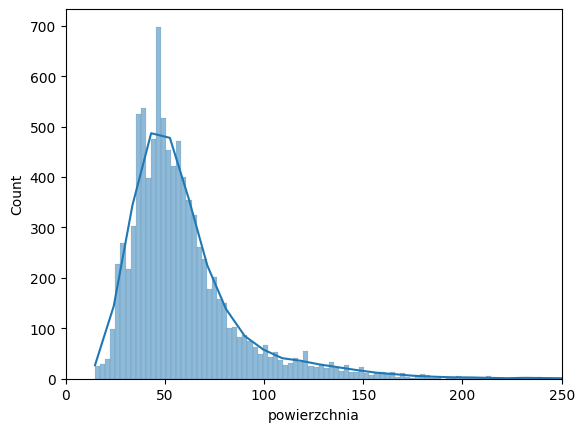

In [114]:
#Wizualizacja rozkładu powierzchni mieszkań
sns.histplot(x= df.powierzchnia, kde = True)
mpl.xlim(0,250)

(0.0, 200.0)

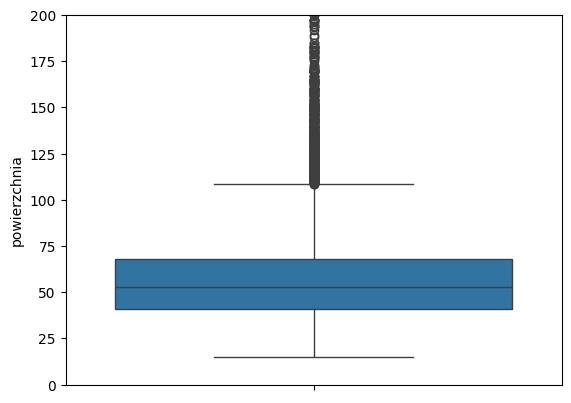

In [115]:
#boxplot rozkładu powierzchni mieszkań
sns.boxplot(y = df["powierzchnia"])
mpl.ylim(0,200)

Text(0, 0.5, 'Gęstość')

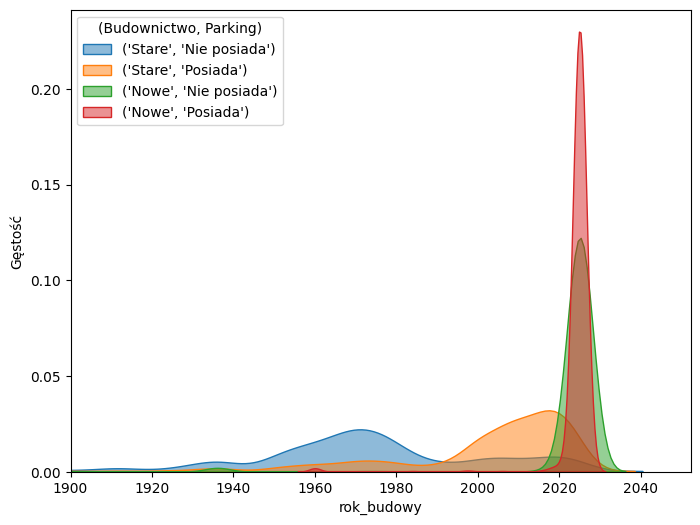

In [116]:
#chyba do wyjevania
mpl.figure(figsize=(8, 6))

subsets = [(False,False),(False,True),(True,False),(True,True)]  #(budownictwo val, parking val )

for val1,val2 in subsets:
    subset = df[(df["budownictwo"] == val1) & (df["parking"] == val2)]
    sns.kdeplot(subset["rok_budowy"], label=f"{ "Nowe" if val1 == 1 else "Stare", "Posiada" if val2 == 1 else "Nie posiada"}", fill=True, alpha =.5)
    
mpl.legend(title = "(Budownictwo, Parking)")
mpl.xlim(1900,)
mpl.ylabel("Gęstość")
#price_m2 i area nie dają tutaj ciekawych wniosków

<Axes: xlabel='piętro', ylabel='Count'>

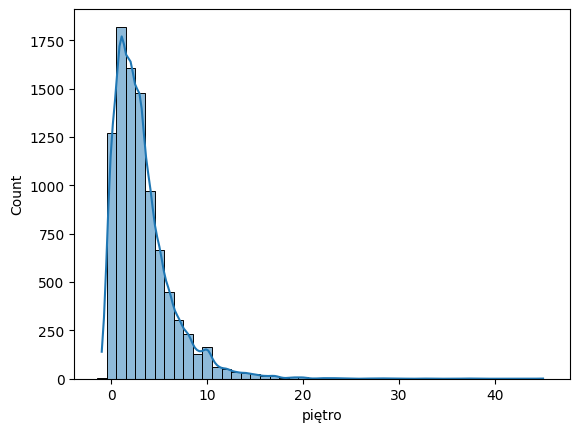

In [117]:
#Wizualizacja rozkładu pięter
sns.histplot(x = df["piętro"], kde=True, discrete=True)

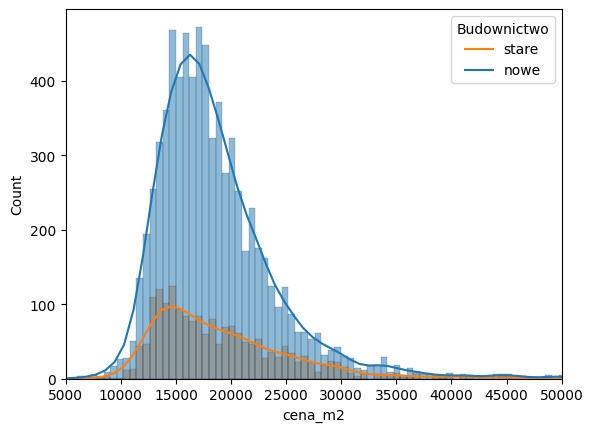

In [118]:
#Wizualizacja rozkładu ceny za metr kwadratowy (w zależności od rodzaju budownictwa)
sns.histplot(x = df["cena_m2"], kde=True, hue=df["budownictwo"])
mpl.xlim(5000, 50000)
mpl.legend(title = "Budownictwo" , labels =["stare","nowe"])

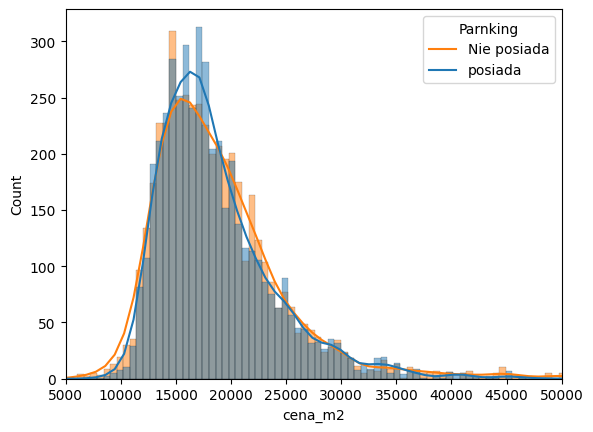

In [119]:
#Wizualizacja rozkładu ceny za metr kwadratowy (w zależności od tego czy oferta zawiera parking)
sns.histplot(x = df["cena_m2"], kde=True, hue=df["parking"])
mpl.xlim(5000, 50000)
mpl.legend(title = "Parnking" , labels =["Nie posiada","posiada"])

Text(0.5, 0, 'Odległość od metra')

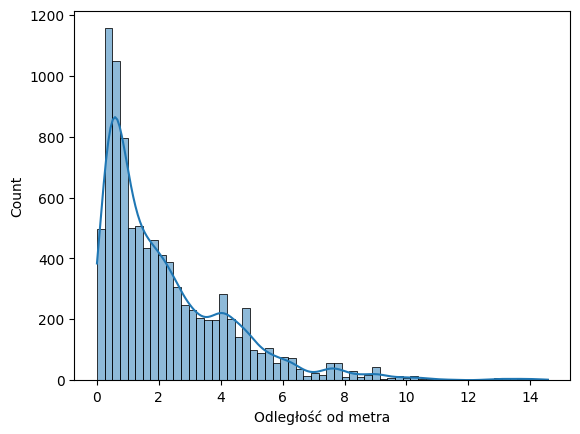

In [120]:
#Wizualizacja rozkładu odległości od metra
sns.histplot(x=df.odl_od_metra, kde=True)
mpl.xlabel("Odległość od metra")

Text(0, 0.5, 'Odległość od metra')

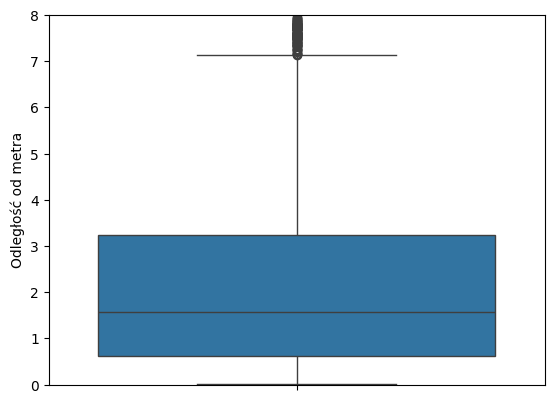

In [121]:
#Boxplot rozkładu odległości od metra
sns.boxplot(y = df.odl_od_metra)
mpl.ylim(0, 8)
mpl.ylabel("Odległość od metra")

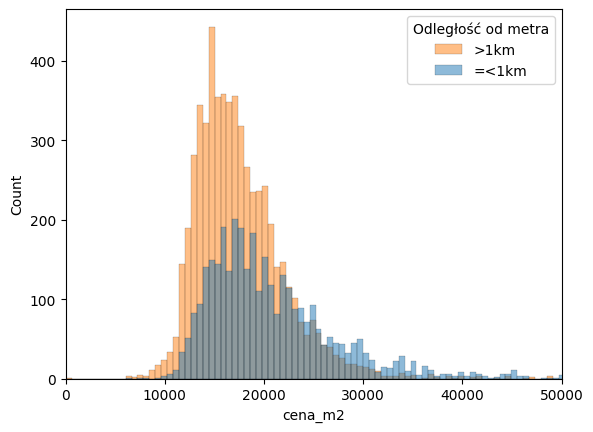

In [122]:
#zależność miedzy ceną za metr kwadratowy a odległością od metra

sns.histplot(x= df.cena_m2 ,hue = df.odl_od_metra.apply(lambda x: x > 1))
mpl.xlim(0,50000)
mpl.legend(title = "Odległość od metra",labels = [">1km", "=<1km"])

Text(0.5, 0, 'Rok budowy')

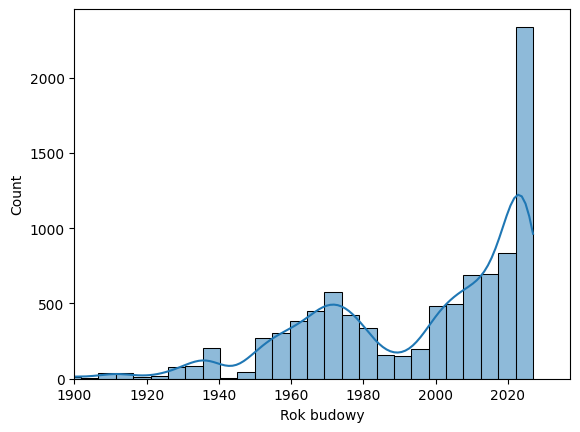

In [123]:
#Wizualizacja rozkładu roku wybudowania mieszkania
sns.histplot(x = df.rok_budowy, kde = True)
mpl.xlim(1900,)
mpl.xlabel("Rok budowy")

Text(0.5, 0, 'Wiek mieszkania')

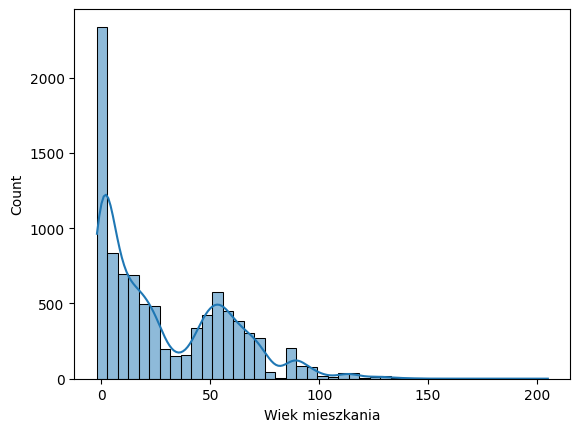

In [124]:
#Wizualizacja wieku mieszkania - > to samo co poprzednio tyle że odwrócone
sns.histplot( x = df["rok_budowy"].copy(deep =True).apply(lambda x: 2025-x), kde = True)
mpl.xlabel("Wiek mieszkania")

Text(0, 0.5, 'Rok budowy')

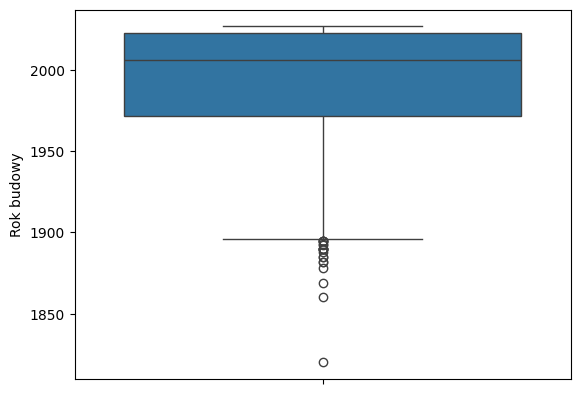

In [125]:
#Boxplot rozkładu daty wubudowania
sns.boxplot(y = df.rok_budowy)
mpl.ylabel("Rok budowy")

Data Preprocessing

In [126]:

#from sklearn.impute import SimpleImputer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler

#usunięcie rekordów zbyt oddalonych od metra
df = df[df["odl_od_metra"] < 8]

#usunięcie outliersów
lof = LocalOutlierFactor()
outliers = lof.fit_predict(df)
df = df[outliers == 1]  

min_max_scaler = MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)



In [127]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)


In [128]:
#processed data frame with both categorical and numerical columns
df_processed = df_scaled.copy(deep = True)

#processed data frame with no categorical columns
df_processed_ncat = df_scaled.drop(columns=[col for col in df.columns if col in ["parking","budownictwo"]], axis=1)

Building Models

In [129]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import calinski_harabasz_score, silhouette_score,davies_bouldin_score

def calculate_scores(data, labels, dict):
    dict["Calinski-Harabasz"].append(calinski_harabasz_score(X=data, labels=labels))
    dict["Silhouette"].append(silhouette_score(X=data, labels=labels))
    dict["Davies-Bouldin"].append(davies_bouldin_score(X=data, labels=labels))

In [130]:

def Kmeans_scoring_df(data: pd.DataFrame):
    
    dictionary = {"clusters":range(5,201,3), "Calinski-Harabasz":[], "Silhouette":[],"Davies-Bouldin":[], "WCSS": []}

    for clusters in dictionary["clusters"]:

        kmeans = KMeans(n_clusters= clusters, max_iter= 500,random_state=42) 
        #fit_transform - odl od centroidów
        #fit_predict - label 

        kmeans.fit(data)
        calculate_scores(data ,kmeans.labels_, dictionary)
        dictionary["WCSS"].append(kmeans.inertia_)

    df_result = pd.DataFrame(dictionary)
    df_result.set_index("clusters", inplace=True)

    return df_result


In [131]:
Kmeans_df_results = Kmeans_scoring_df(df_processed)
Kmeans_df_results_ncat = Kmeans_scoring_df(df_processed_ncat)

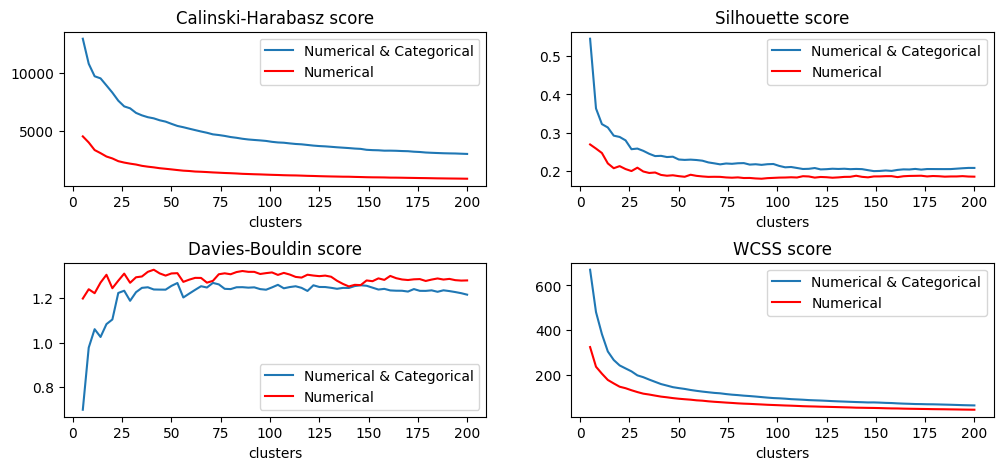

In [132]:
fig, axes = mpl.subplots(2, 2, figsize=(12, 5))

for idx, score in enumerate(Kmeans_df_results.columns):

    posx, posy = int(idx >= 2), int(idx % 2)
    
    sns.lineplot(x=Kmeans_df_results.index, y=Kmeans_df_results[score], ax=axes[posx, posy],label="Numerical & Categorical")
    sns.lineplot(x=Kmeans_df_results_ncat.index, y=Kmeans_df_results_ncat[score], ax=axes[posx, posy], color="r", label="Numerical")
    axes[posx, posy].set_ylabel("")
    axes[posx, posy].set_title(score + " score")
    
mpl.subplots_adjust(hspace=0.5)

PCA

In [133]:
from sklearn.decomposition import PCA

kmeans_model = KMeans(15, max_iter=500, random_state=42)
kmeans_model.fit_predict(df_processed_ncat)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_processed_ncat)

pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
pca_df["Klaster (Kmeans)"] = kmeans_model.labels_

pca_df

,PC1,PC2,Klaster (Kmeans)
0,0.712026,-0.240429,12
1,0.366646,-0.001953,1
2,-0.224743,-0.024920,2
3,0.235743,-0.172041,9
4,0.290443,-0.157740,9
...,...,...,...
8826,-0.313029,-0.047091,0
8827,-0.141437,0.183999,5
8828,-0.135059,0.127376,14
8829,-0.142286,0.148438,14


In [134]:

loadings = pd.DataFrame(
    pca.components_.T,  
    columns=["PC1", "PC2"],
    index=df_processed_ncat.columns  # indeks-> orginalne kolumny
)

print("Największy wpływ na PC1:")
print(loadings["PC1"].sort_values(ascending=False).head(10))

print("\nNajwiększy wpływ na PC2:")
print(loadings["PC2"].sort_values(ascending=False).head(10))


Największy wpływ na PC1:
odl_od_metra    0.816112
rok_budowy      0.561453
powierzchnia    0.018769
piętro         -0.051040
cena_m2        -0.125595
Name: PC1, dtype: float64

Największy wpływ na PC2:
rok_budowy      0.803941
cena_m2         0.285046
powierzchnia    0.099890
piętro          0.074532
odl_od_metra   -0.506848
Name: PC2, dtype: float64


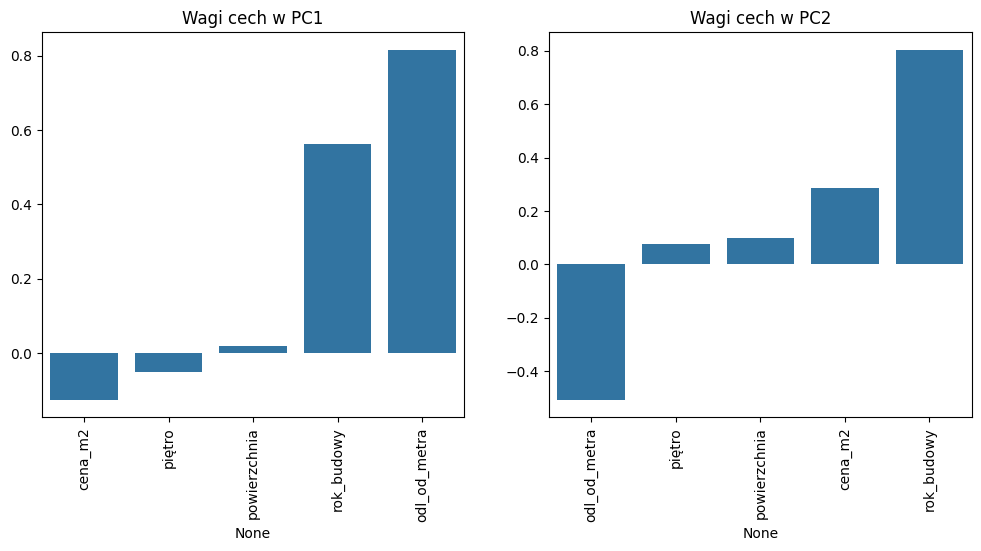

In [135]:
fig, axes = mpl.subplots(1, 2, figsize=(12, 5))

for idx, pca_col in enumerate(loadings.columns):
    sorted = loadings[pca_col].sort_values(ascending=True) 
    sns.barplot(x=sorted.index, y=sorted.values, ax=axes[idx])
    axes[idx].set_title(f"Wagi cech w {pca_col}")
    axes[idx].tick_params(axis='x', rotation=90)

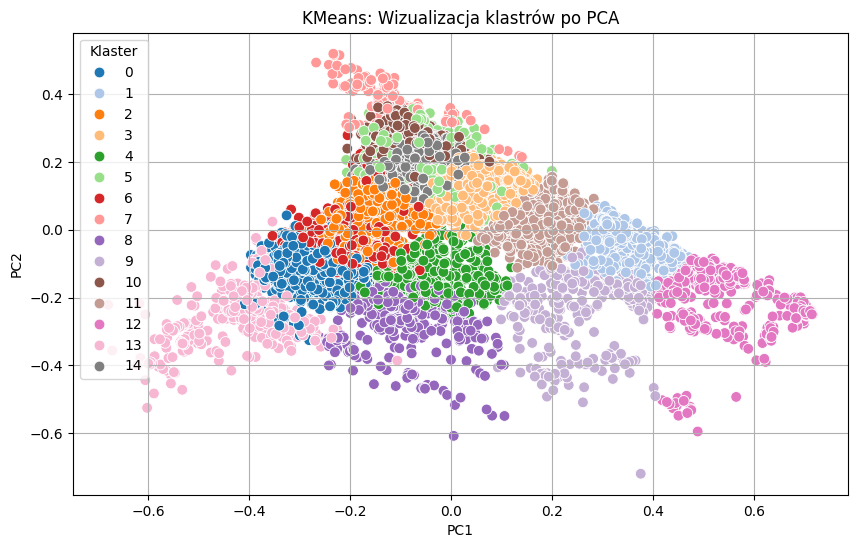

In [136]:
mpl.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Klaster (Kmeans)", palette="tab20", s=60)
mpl.title("KMeans: Wizualizacja klastrów po PCA")
mpl.legend(title="Klaster")
mpl.grid(True)
mpl.show()


Analiza wyników dla Kmeans

In [137]:
df["Kmeans klaster"] = kmeans_model.labels_
df.head(10)

,powierzchnia,odl_od_metra,rok_budowy,parking,piętro,budownictwo,cena_m2,Kmeans klaster
2,60.00,7.791,2024.0,True,0,True,13666.67,12
3,130.84,4.281,2025.0,True,0,True,10623.66,1
4,50.00,0.540,1977.0,False,4,False,15500.00,2
5,65.10,4.270,1995.0,True,3,False,13056.84,9
13,43.90,4.673,2001.0,False,8,False,13895.22,9
14,125.00,4.673,2002.0,True,3,False,10000.00,9
15,83.55,6.983,2025.0,True,0,True,10760.02,12
18,52.47,4.482,2024.0,True,1,True,11200.00,1
19,54.64,4.482,2024.0,True,0,True,11700.00,1
20,66.15,4.482,2024.0,True,1,True,10649.99,1


(0.0, 200.0)

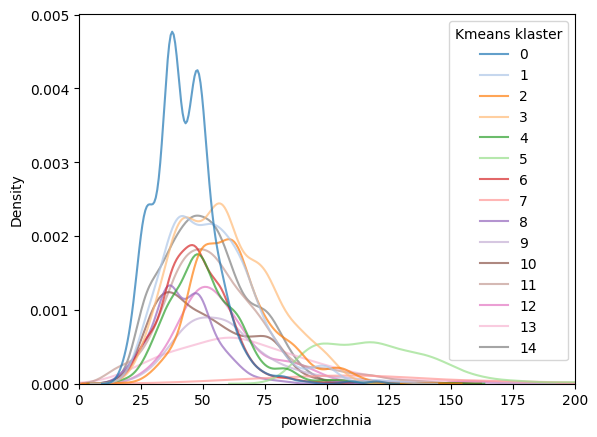

In [139]:
sns.kdeplot(x= df["powierzchnia"], hue = df["Kmeans klaster"], palette="tab20", alpha = 0.7)
mpl.xlim(0,200)

(0.0, 50000.0)

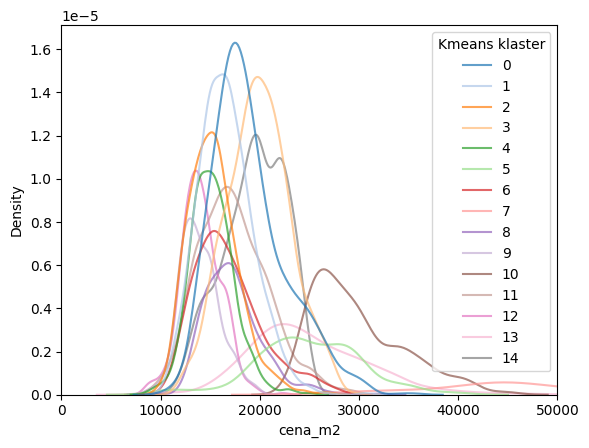

In [140]:
sns.kdeplot(x= df["cena_m2"], hue = df["Kmeans klaster"], palette="tab20", alpha = 0.7)
mpl.xlim(0,50000)

<Axes: xlabel='odl_od_metra', ylabel='Density'>

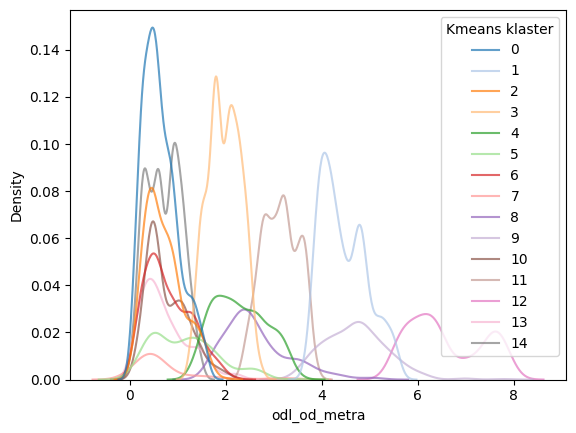

In [142]:
sns.kdeplot(x= df["odl_od_metra"], hue = df["Kmeans klaster"], palette="tab20", alpha =0.7)

<Axes: xlabel='rok_budowy', ylabel='Density'>

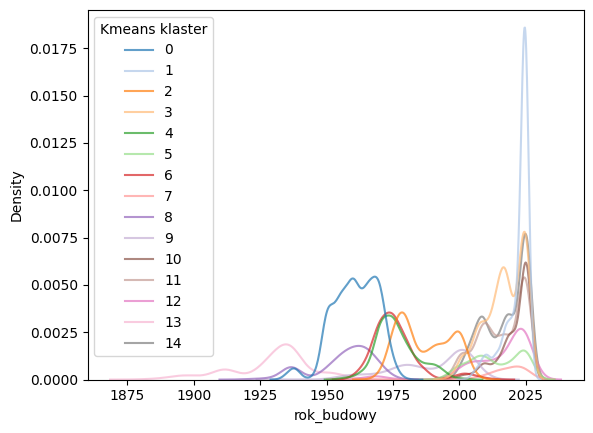

In [143]:
sns.kdeplot(x= df["rok_budowy"], hue = df["Kmeans klaster"], palette="tab20", alpha = 0.7)

Można zrobić jescze boxploty, wykresy dla każdego klastra oddzielnie

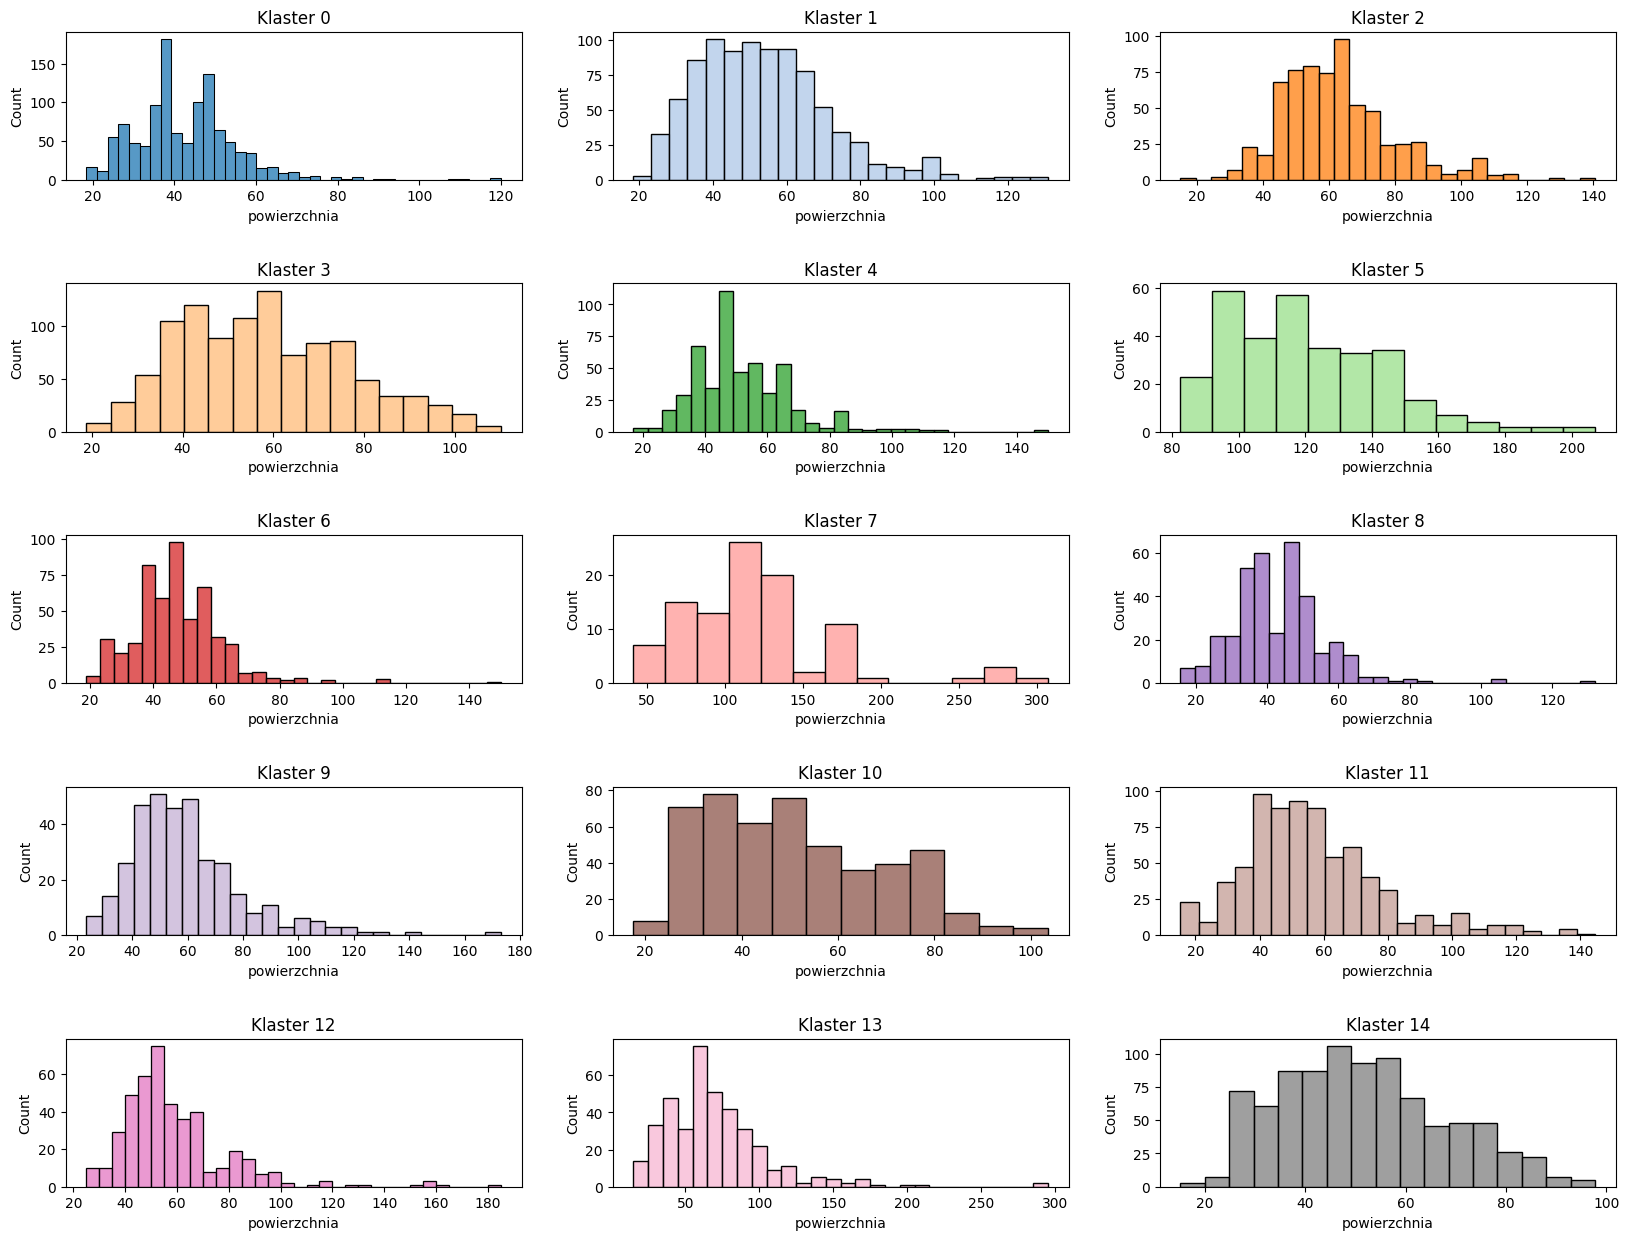

In [144]:
fig, axes = mpl.subplots(5, 3, figsize = (20, 15))
colors= mpl.get_cmap('tab20')


for cluster_num in range(15): #bo mamy 15 klastrów
    posy, posx = cluster_num% 3 , cluster_num // 3
    df_cluster = df[df["Kmeans klaster"] == cluster_num]
    sns.histplot(x=df_cluster["powierzchnia"], ax = axes[posx, posy], color = colors(cluster_num / 20))
    axes[posx, posy].set_title(f"Klaster {cluster_num}")

mpl.subplots_adjust(hspace=0.7)


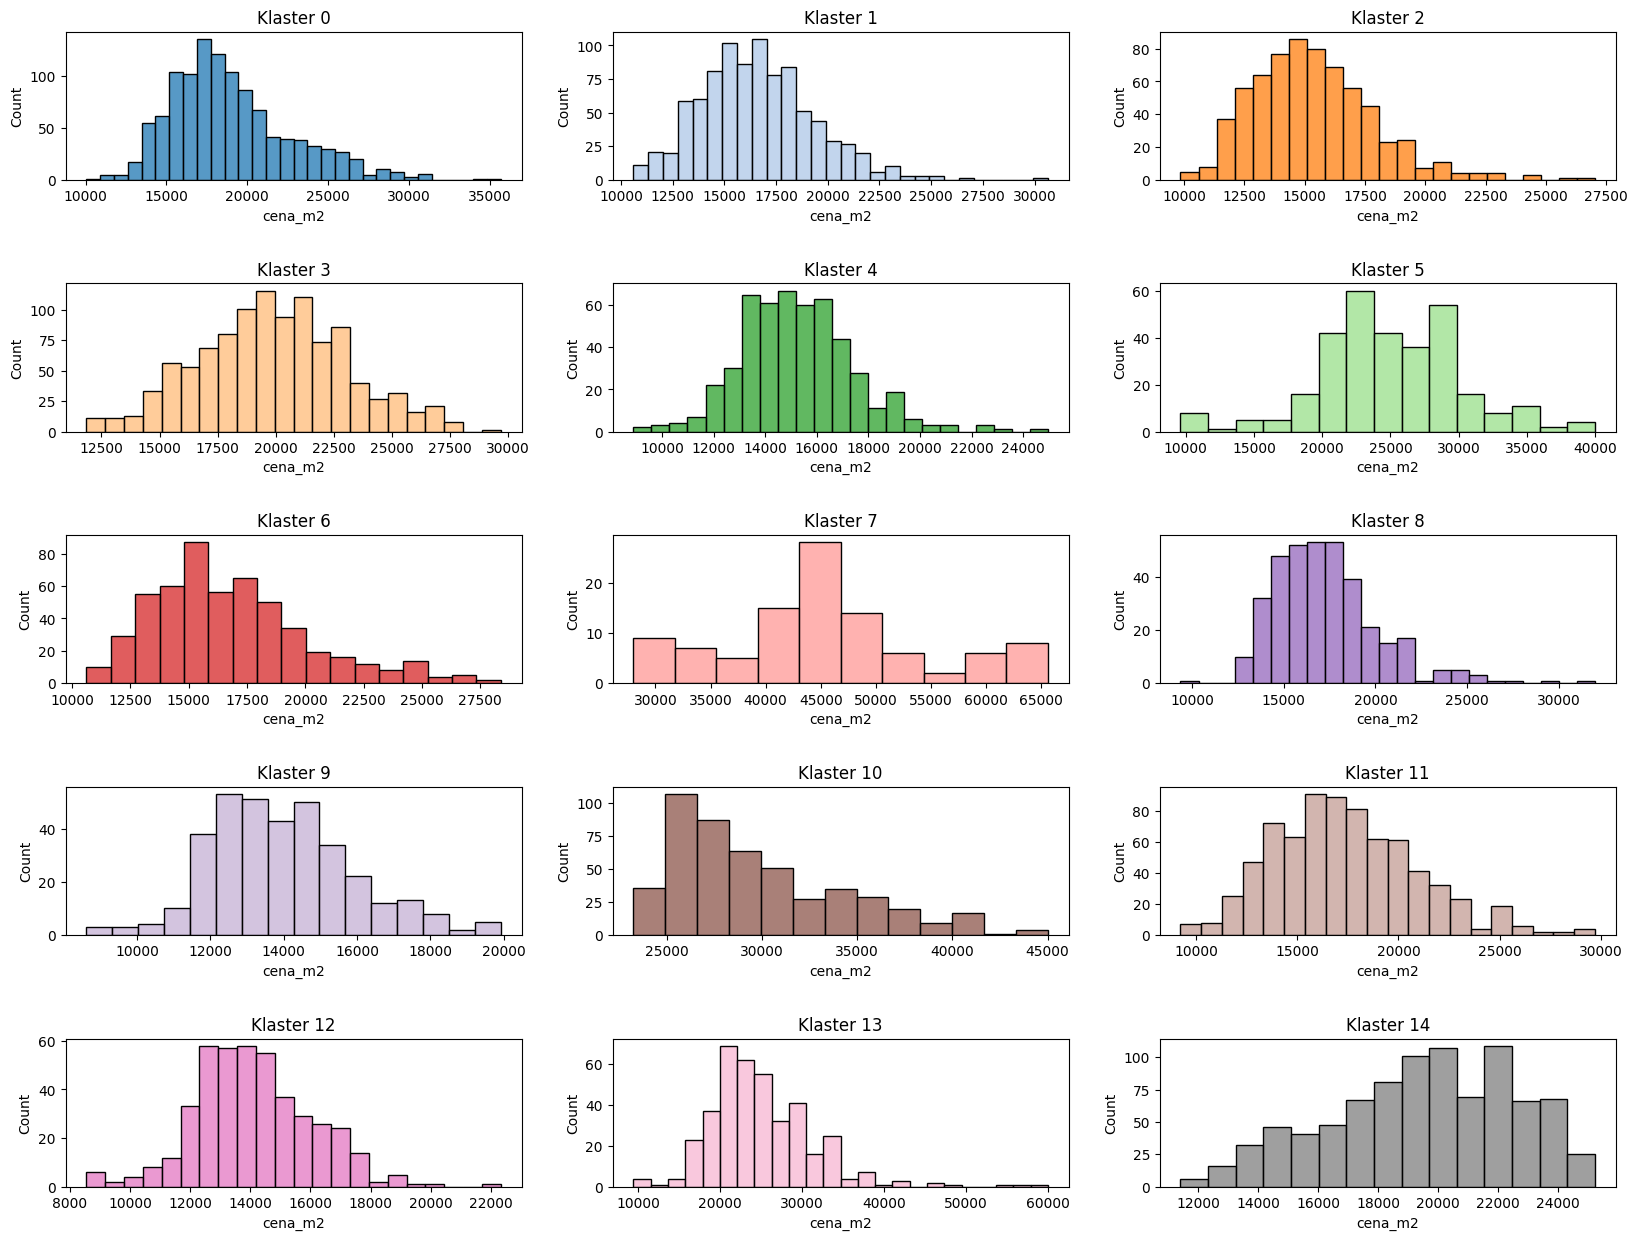

In [145]:
fig, axes = mpl.subplots(5, 3, figsize = (20, 15))

for cluster_num in range(15): 
    posy, posx = cluster_num% 3 , cluster_num // 3
    df_cluster = df[df["Kmeans klaster"] == cluster_num]
    sns.histplot(x=df_cluster["cena_m2"], ax = axes[posx, posy], color = colors(cluster_num / 20))
    axes[posx, posy].set_title(f"Klaster {cluster_num}")

mpl.subplots_adjust(hspace=0.7)

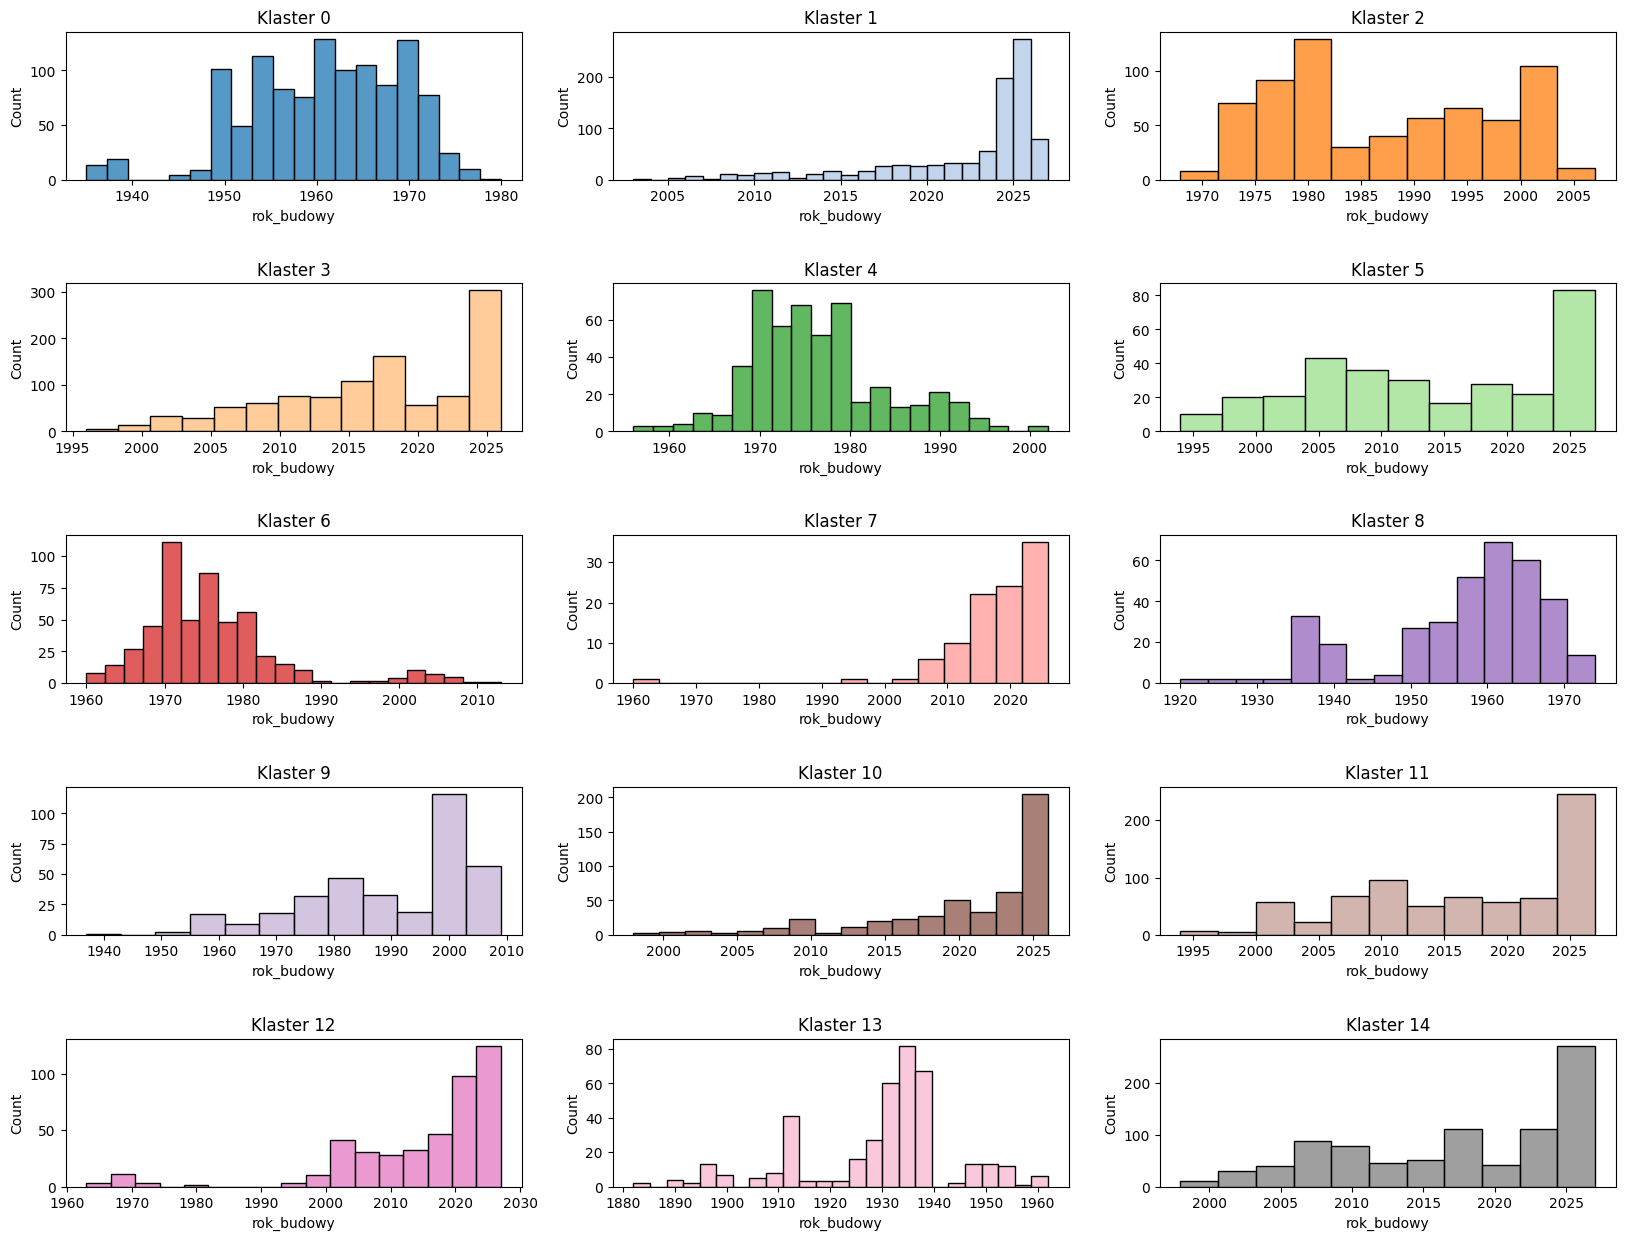

In [146]:
fig, axes = mpl.subplots(5, 3, figsize = (20, 15))

for cluster_num in range(15): 
    posy, posx = cluster_num% 3 , cluster_num // 3
    df_cluster = df[df["Kmeans klaster"] == cluster_num]
    sns.histplot(x=df_cluster["rok_budowy"], ax = axes[posx, posy], color = colors(cluster_num / 20))
    axes[posx, posy].set_title(f"Klaster {cluster_num}")

mpl.subplots_adjust(hspace=0.7)

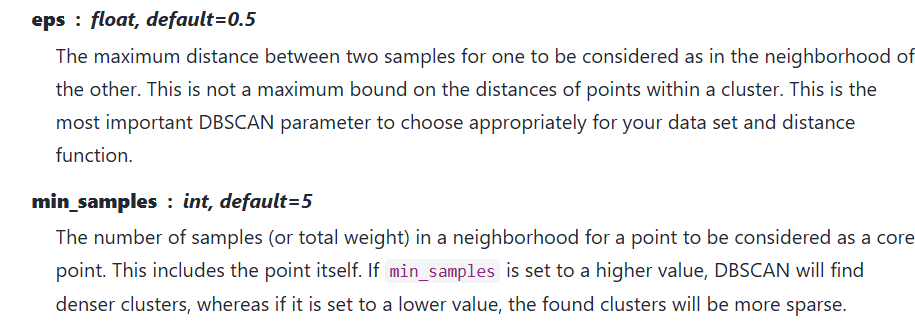

In [147]:
#naprawić dbscan cuś sie podziało -> pewnie wina normalizacji i trzeba dobrac odpowiednio maly epsilon

# większy epsilon - > mniejszy noise
# większy min_samples - > większy noise

def DBscan_scoring_df(data: pd.DataFrame):

    dictionary = {"clusters":  [], "Calinski-Harabasz":[], "Silhouette":[],"Davies-Bouldin":[], "Noise": []}

    epsilon = np.arange(0.05,0.26, 0.02)
    min_samples = np.arange(5, 10, 1)

    cartesian_product = np.array(np.meshgrid(epsilon, min_samples)).T.reshape(-1, 2)

    for epsilon, samples in cartesian_product:     

        dbscan = DBSCAN(eps = epsilon, min_samples= int(samples) , n_jobs = -1)
        dbscan.fit_predict(data)
        """
        print(len(set(dbscan.labels_)), epsilon, samples)
        
        if len(set(dbscan.labels_))> 1:
            calculate_scores(data, dbscan.labels_, dictionary)
        else:
            for score in list(dictionary.keys())[:-1]:
                dictionary[score].append(None
        """
        calculate_scores(data, dbscan.labels_, dictionary)
        dictionary["Noise"].append(np.sum(dbscan.labels_ == -1))
        dictionary["clusters"].append(len(set(dbscan.labels_)))

    return pd.concat([pd.DataFrame(cartesian_product, columns=["epsilon", "min_samples"]), pd.DataFrame(dictionary)], axis = 1)



In [149]:
DBscan_df_results = DBscan_scoring_df(df_processed)
DBscan_df_results_ncat = DBscan_scoring_df(df_processed_ncat)

In [150]:
DBscan_df_results.head(20)

,epsilon,min_samples,clusters,Calinski-Harabasz,Silhouette,Davies-Bouldin,Noise
0,0.05,5.0,127,99.169339,-0.450578,1.185049,3447
1,0.05,6.0,111,96.398906,-0.437540,1.169953,3906
2,0.05,7.0,95,95.311933,-0.422305,1.160530,4323
3,0.05,8.0,77,99.111362,-0.461235,1.135912,4765
4,0.05,9.0,65,101.841280,-0.451304,1.107749,5155
5,0.07,5.0,47,586.252035,-0.200309,1.105038,1256
6,0.07,6.0,36,693.950159,-0.192656,1.102237,1442
7,0.07,7.0,33,706.640273,-0.156780,1.105892,1612
8,0.07,8.0,23,934.048383,-0.118818,1.103919,1808
9,0.07,9.0,22,918.811497,-0.092949,1.115679,1941


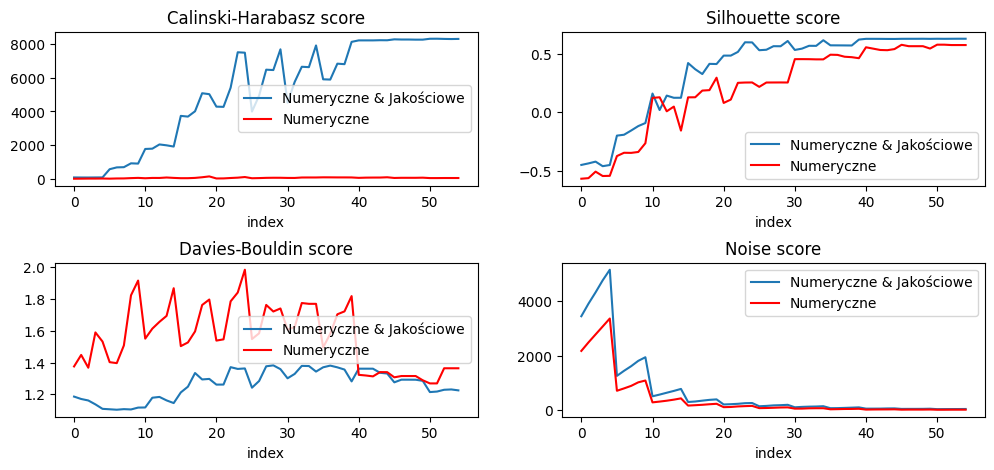

In [151]:
fig, axes = mpl.subplots(2, 2, figsize=(12, 5))

highlight_idx = np.arange(0,35,5)  

for idx, score in enumerate(DBscan_df_results.columns[3:]):

    posx, posy = int(idx >= 2), int(idx % 2)
    
    sns.lineplot(x=DBscan_df_results.index, y=DBscan_df_results[score], ax=axes[posx, posy], label="Numeryczne & Jakościowe")
    sns.lineplot(x=DBscan_df_results_ncat.index, y=DBscan_df_results_ncat[score], ax=axes[posx, posy], color="red", label="Numeryczne")
    #sns.scatterplot(x = DBscan_df_results.index[highlight_idx], y =DBscan_df_results[score][highlight_idx], 
    #                color='green', zorder=3, label="Epsilon change" , ax=axes[posx,posy])
    
    axes[posx, posy].set_xlabel("index")
    axes[posx, posy].set_ylabel("")
    axes[posx, posy].set_title(score + " score")

mpl.subplots_adjust(hspace=0.5)

#trzeba znaleźć w miarę optymalne (epsilon,min_samples)


Text(0.5, 0, 'index')

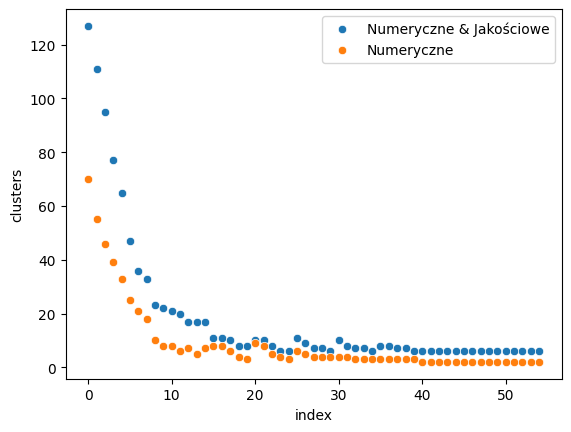

In [152]:

sns.scatterplot(x = DBscan_df_results.index, y = DBscan_df_results["clusters"], label="Numeryczne & Jakościowe")
sns.scatterplot(x = DBscan_df_results_ncat.index, y = DBscan_df_results_ncat["clusters"] ,label = "Numeryczne")
mpl.xlabel("index")

In [153]:
dbscan_model = DBSCAN(eps=0.11, min_samples= 5)
dbscan_model.fit_predict(df_processed)

pca_df["Klaster (DBSCAN)"] = dbscan_model.labels_
pca_df

,PC1,PC2,Klaster (Kmeans),Klaster (DBSCAN)
0,0.712026,-0.240429,12,0
1,0.366646,-0.001953,1,-1
2,-0.224743,-0.024920,2,1
3,0.235743,-0.172041,9,2
4,0.290443,-0.157740,9,1
...,...,...,...,...
8826,-0.313029,-0.047091,0,1
8827,-0.141437,0.183999,5,2
8828,-0.135059,0.127376,14,2
8829,-0.142286,0.148438,14,2


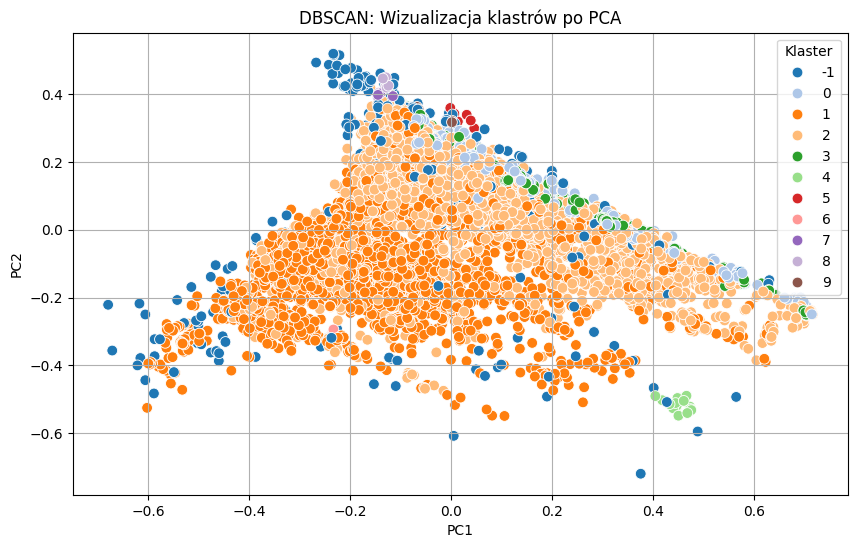

In [154]:
mpl.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Klaster (DBSCAN)", palette="tab20", s=60)
mpl.title("DBSCAN: Wizualizacja klastrów po PCA")
mpl.legend(title="Klaster")
mpl.grid(True)
mpl.show()

In [157]:
df["DBSCAN klaster"] = dbscan_model.labels_
df

,powierzchnia,odl_od_metra,rok_budowy,parking,piętro,budownictwo,cena_m2,Kmeans klaster,DBSCAN klaster
2,60.00,7.791,2024.0,True,0,True,13666.67,12,0
3,130.84,4.281,2025.0,True,0,True,10623.66,1,-1
4,50.00,0.540,1977.0,False,4,False,15500.00,2,1
5,65.10,4.270,1995.0,True,3,False,13056.84,9,2
13,43.90,4.673,2001.0,False,8,False,13895.22,9,1
...,...,...,...,...,...,...,...,...,...
10052,29.00,0.048,1968.0,False,4,False,16206.90,0,1
10054,96.30,0.478,2004.0,True,5,False,23001.04,5,2
10055,55.00,0.511,2002.0,True,4,False,17527.27,14,2
10056,69.00,0.511,2002.0,True,6,False,20000.00,14,2


(0.0, 200.0)

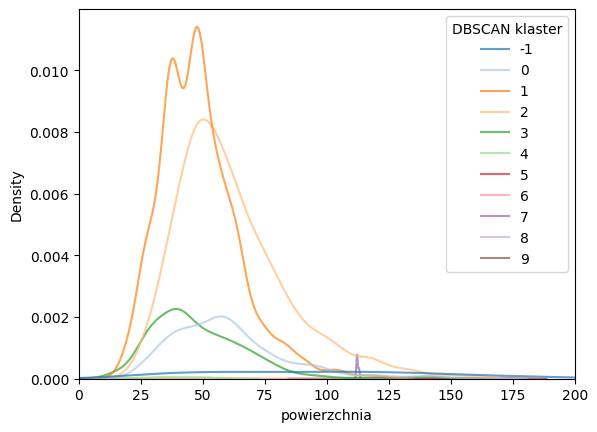

In [158]:
sns.kdeplot(x= df["powierzchnia"], hue = df["DBSCAN klaster"], palette="tab20", alpha = 0.7)
mpl.xlim(0,200)

(0.0, 50000.0)

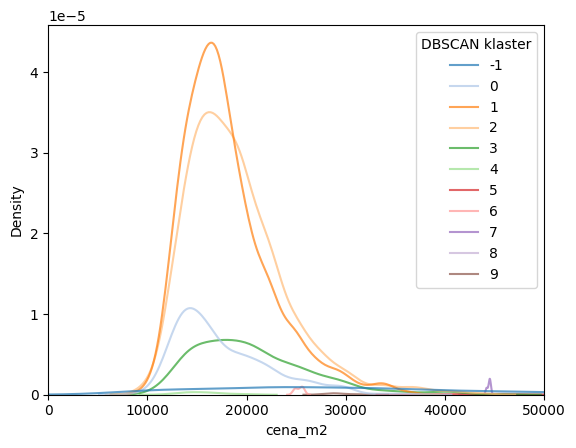

In [159]:
sns.kdeplot(x= df["cena_m2"], hue = df["DBSCAN klaster"], palette="tab20", alpha = 0.7)
mpl.xlim(0,50000)

<Axes: xlabel='odl_od_metra', ylabel='Density'>

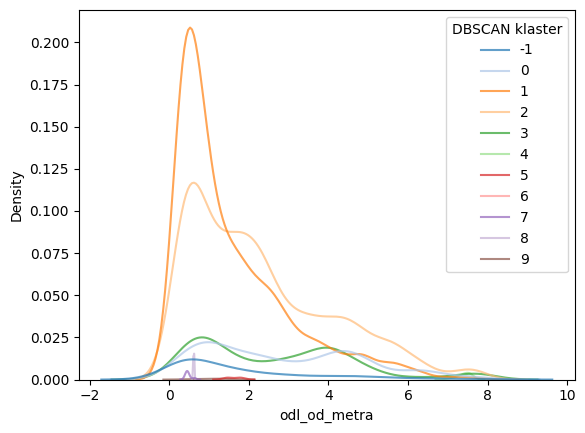

In [161]:
sns.kdeplot(x= df["odl_od_metra"], hue = df["DBSCAN klaster"], palette="tab20", alpha =0.7, warn_singular=False)

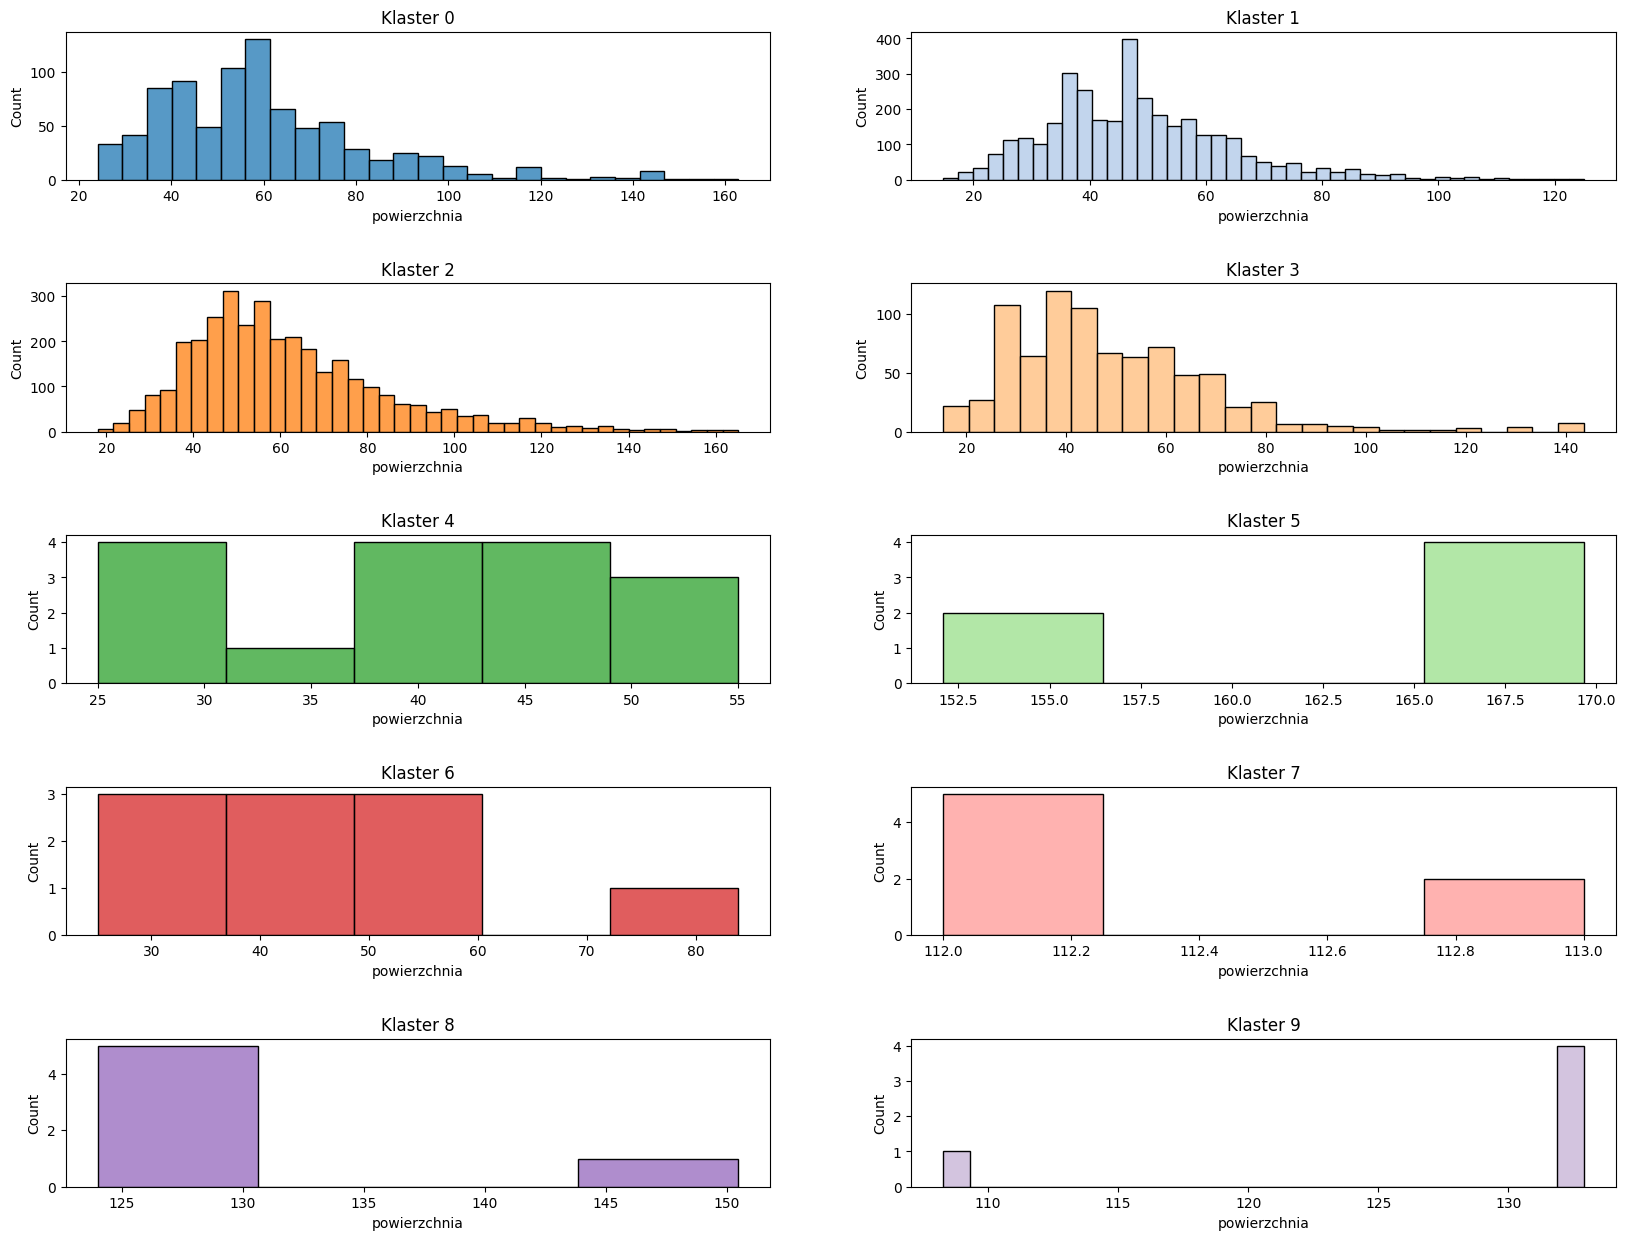

In [169]:
fig, axes = mpl.subplots(5, 2, figsize = (20, 15))
colors= mpl.get_cmap('tab20')


for cluster_num in range(10): #bo mamy 15 klastrów
    posy, posx = cluster_num% 2 , cluster_num // 2
    df_cluster = df[df["DBSCAN klaster"] == cluster_num]
    sns.histplot(x=df_cluster["powierzchnia"], ax = axes[posx, posy], color = colors(cluster_num / 20))
    axes[posx, posy].set_title(f"Klaster {cluster_num}")

mpl.subplots_adjust(hspace=0.7)

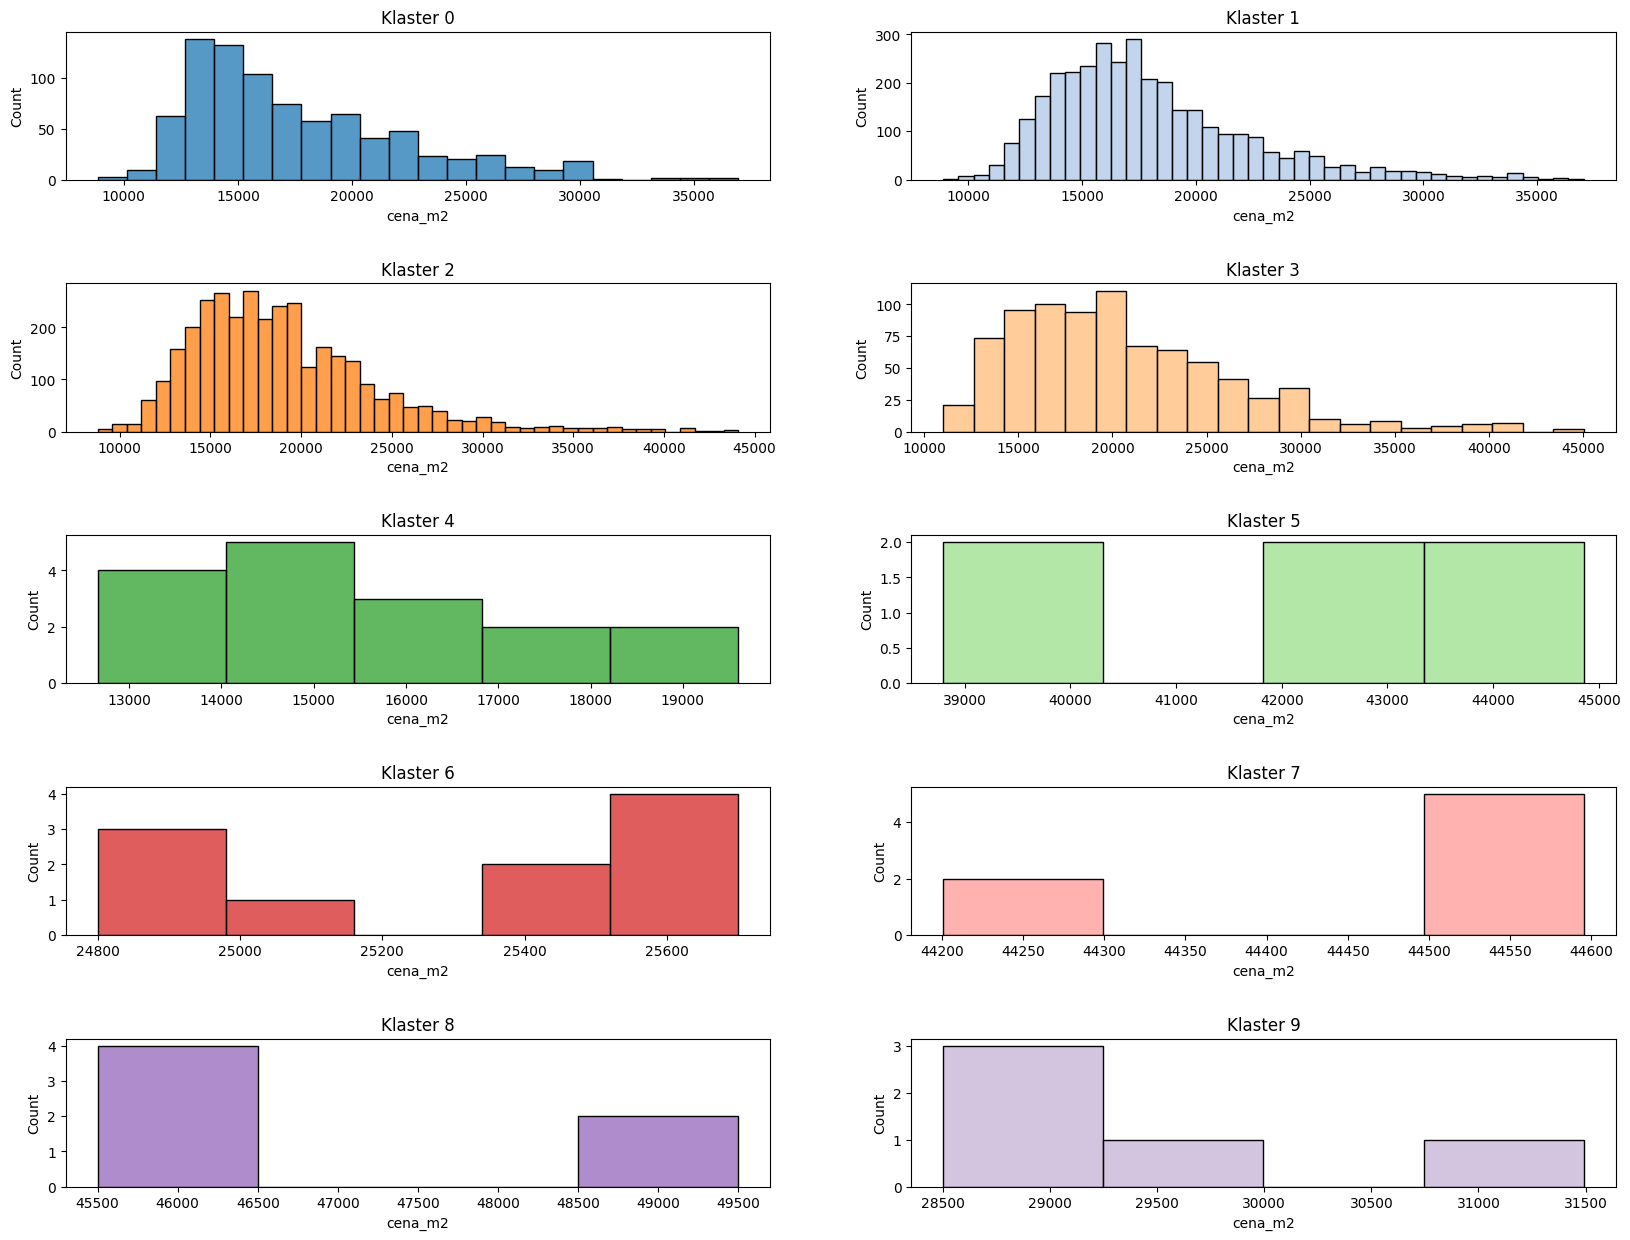

In [170]:
fig, axes = mpl.subplots(5, 2, figsize = (20, 15))
colors= mpl.get_cmap('tab20')


for cluster_num in range(10): #bo mamy 15 klastrów
    posy, posx = cluster_num% 2 , cluster_num // 2
    df_cluster = df[df["DBSCAN klaster"] == cluster_num]
    sns.histplot(x=df_cluster["cena_m2"], ax = axes[posx, posy], color = colors(cluster_num / 20))
    axes[posx, posy].set_title(f"Klaster {cluster_num}")

mpl.subplots_adjust(hspace=0.7)

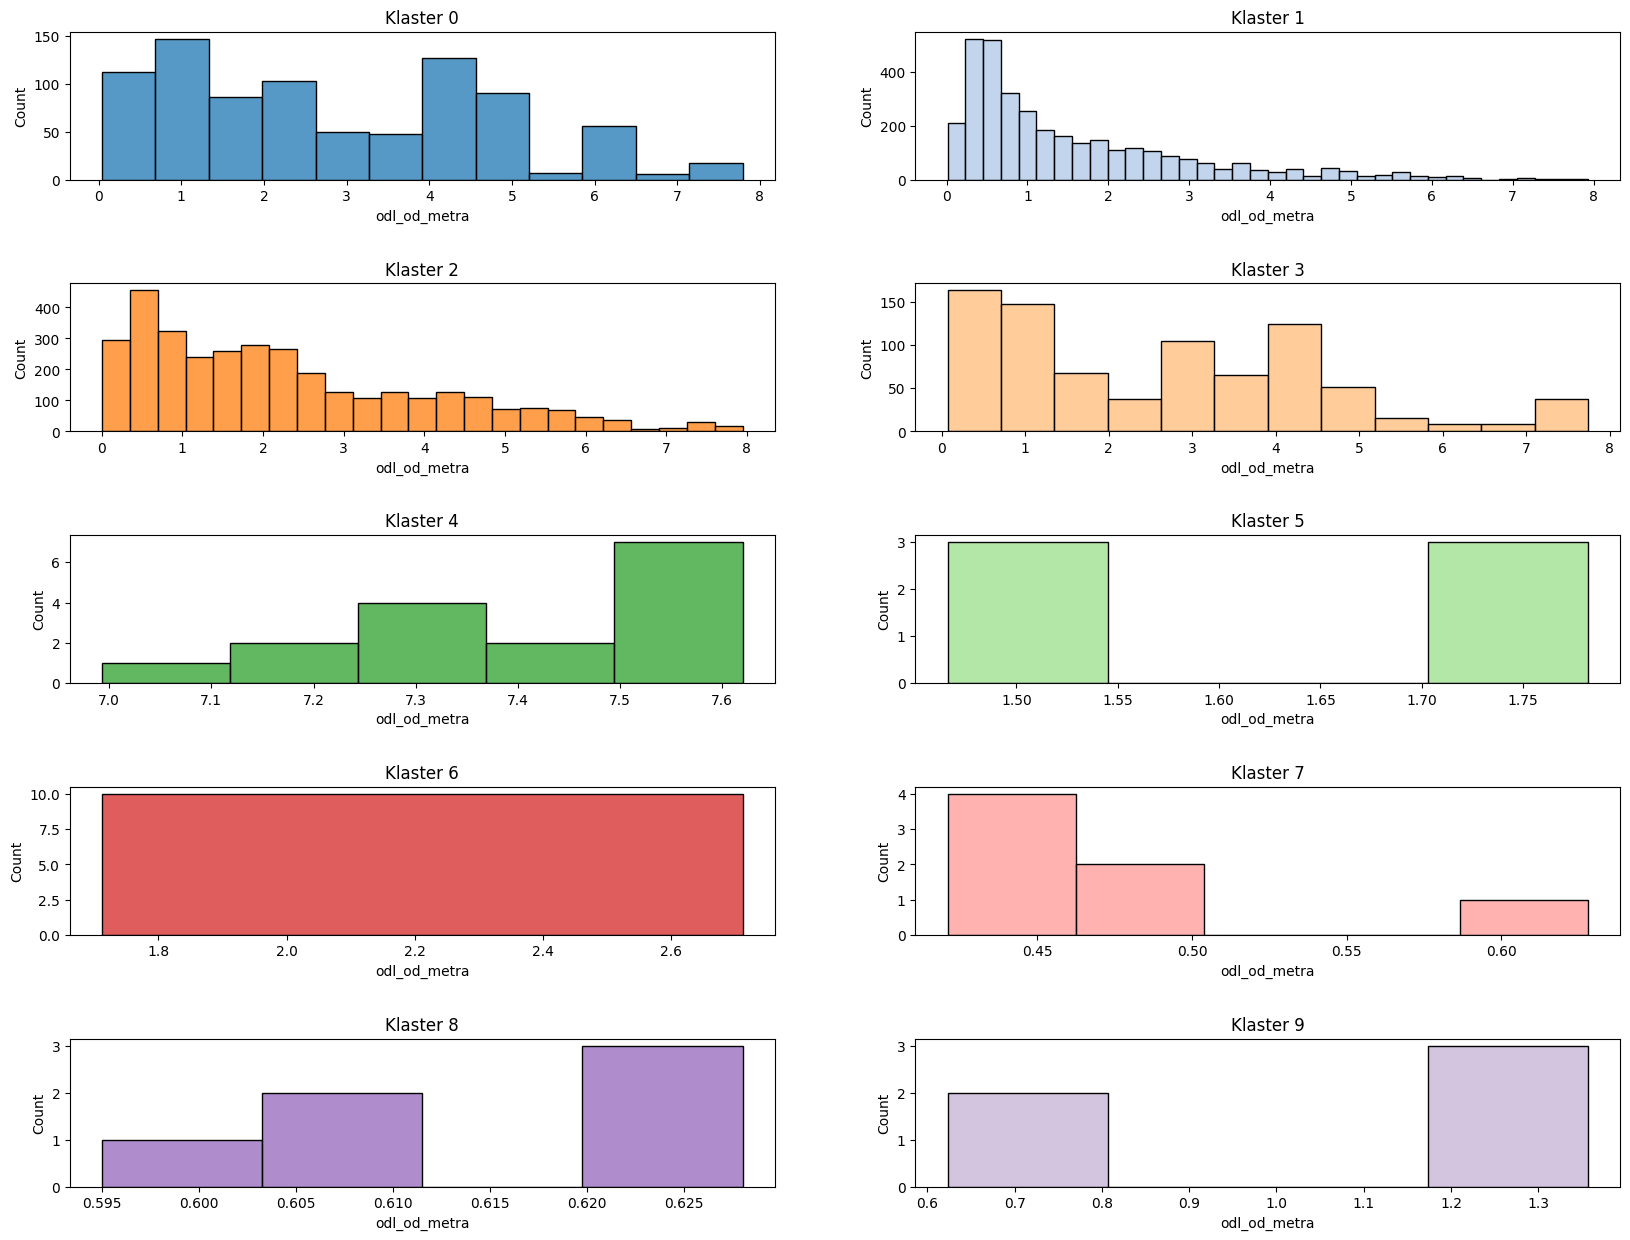

In [172]:
fig, axes = mpl.subplots(5, 2, figsize = (20, 15))
colors= mpl.get_cmap('tab20')


for cluster_num in range(10): #bo mamy 15 klastrów
    posy, posx = cluster_num% 2 , cluster_num // 2
    df_cluster = df[df["DBSCAN klaster"] == cluster_num]
    sns.histplot(x=df_cluster["odl_od_metra"], ax = axes[posx, posy], color = colors(cluster_num / 20))
    axes[posx, posy].set_title(f"Klaster {cluster_num}")

mpl.subplots_adjust(hspace=0.7)